<a href="https://colab.research.google.com/github/sehajini1/credit-card-fraud-detection-model/blob/main/CreditCardFraudDetectionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install and import the necessary libraries.

In [ ]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored as cl

In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 8.1 MB/s 
     |████████████████████████████████| 101 kB 10.1 MB/s 
     |████████████████████████████████| 78 kB 6.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 53.6 MB/s 
     |████████████████████████████████| 28.5 MB 1.6 MB/s 
     |████████████████████████████████| 749 kB 63.5 MB/s 
     |████████████████████████████████| 133 kB 46.6 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
     |████████████████████████████████| 1.0 MB 51.8 MB/s 
     |████████████████████████████████| 965 kB 60.8 MB/s 
     |████████████████████████████████| 232 kB 47.5 MB/s 
     |████████████████████████████████| 96 kB 5.1 MB/s 
     |████████████████████████████████| 1.6 MB 44.9 MB/s 
     |██████████████████████

In [ ]:
from dataprep.eda import *

# About the dataset

Import the dataset

In [ ]:
#import the data set
dataset = pd.read_csv("creditcard.csv")

View the full dataset

In [ ]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


View the dataset head (contains only 5 rows and 31 columns)

In [ ]:
#view the data set
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Number of the rows and columns

In [ ]:
dataset.shape

(284807, 31)

In the data set has 284807 rows and 31 columns.

Features = 28


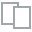
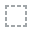
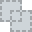
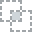
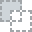
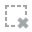
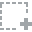
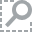
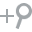
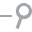
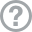
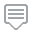
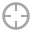
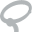
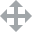
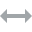
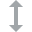
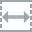
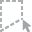
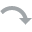
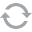
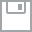
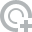
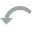
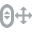
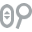
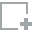
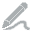
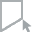
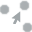
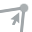
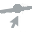

In [ ]:
plot(dataset)

Details about target values are given below.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#check the null values
print(dataset.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Data Processing and Understanding**

In [ ]:
total_transaction = len(dataset)
normal_transaction = len(dataset[dataset.Class == 0])
fraudulent_transaction = len(dataset[dataset.Class == 1])
fraud_percentage = round(fraudulent_transaction/normal_transaction*100, 2)
print(cl('Total number of trnsactions are {}'.format(total_transaction), attrs = ['bold']))
print(cl('Number of normal transactions are {}'.format(normal_transaction), attrs = ['bold']))
print(cl('Number of fraudulent transactions are {}'.format(fraudulent_transaction), attrs = ['bold']))
print(cl('Percentage of fraud transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Total number of trnsactions are 284807
Number of normal transactions are 284315
Number of fraudulent transactions are 492
Percentage of fraud transactions is 0.17


**Remove the duplicate data**

Check the duplicates

In [ ]:
#check the duplicate
dataset.duplicated().sum()

1081

Remove the duplicates

In [ ]:
#Removing duplicate
dataset = dataset.drop_duplicates(keep='first')

In [ ]:
dataset.duplicated().sum()

0

# ***Now we start creating the model.***

In [ ]:
dataset_minimum = dataset.min(axis = 0 )

In [ ]:
dataset_maximum = dataset.max(axis = 0 )

In [ ]:
dataset_minimum

Time        0.000000
V1        -56.407510
V2        -72.715728
V3        -48.325589
V4         -5.683171
V5       -113.743307
V6        -26.160506
V7        -43.557242
V8        -73.216718
V9        -13.434066
V10       -24.588262
V11        -4.797473
V12       -18.683715
V13        -5.791881
V14       -19.214325
V15        -4.498945
V16       -14.129855
V17       -25.162799
V18        -9.498746
V19        -7.213527
V20       -54.497720
V21       -34.830382
V22       -10.933144
V23       -44.807735
V24        -2.836627
V25       -10.295397
V26        -2.604551
V27       -22.565679
V28       -15.430084
Amount      0.000000
Class       0.000000
dtype: float64

Check the features distribution.

In [ ]:
dataset_minmax = dataset_minimum.to_frame()

In [ ]:
dataset_minmax = dataset_minmax.rename(columns = {'item':'Minimum'})

In [ ]:
dataset_minmax

,0
Time,0.000000
V1,-56.407510
V2,-72.715728
V3,-48.325589
V4,-5.683171
V5,-113.743307
V6,-26.160506
V7,-43.557242
V8,-73.216718
V9,-13.434066


In [ ]:
dataset_minmax['Maximum'] = dataset_maximum

In [ ]:
dataset_minmax

,0,Maximum
Time,0.000000,172792.000000
V1,-56.407510,2.454930
V2,-72.715728,22.057729
V3,-48.325589,9.382558
V4,-5.683171,16.875344
V5,-113.743307,34.801666
V6,-26.160506,73.301626
V7,-43.557242,120.589494
V8,-73.216718,20.007208
V9,-13.434066,15.594995


Drop time and amount columns

In [ ]:
dataset.drop(["Time","Amount"],axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Time is not effect to our target and amount is huegly deviate from the data set.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
x

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
        -1.89114844e-01,  1.33558377e-01, -2.10530535e-02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
         1.25894532e-01, -8.98309914e-03,  1.47241692e-02],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -1.39096572e-01, -5.53527940e-02, -5.97518406e-02],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
        -8.73705959e-02,  4.45477214e-03, -2.65608286e-02],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         5.46668462e-01,  1.08820735e-01,  1.04532821e-01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -8.18267121e-01, -2.41530880e-03,  1.36489143e-02]])

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#standalazation
scale = StandardScaler().fit_transform(x)
print(scale)

[[-0.70108232 -0.04168726  1.68010106 ... -0.39262206  0.33303251
  -0.06584955]
 [ 0.60879165  0.16413764  0.10927902 ...  0.26085374 -0.0271543
   0.0432187 ]
 [-0.7003364  -0.81133678  1.17426962 ... -0.28886092 -0.14432548
  -0.18382429]
 ...
 [ 0.98235398 -0.18043304 -2.15503257 ... -0.18155722  0.00680174
  -0.08264021]
 [-0.12646526  0.32465977  0.46457662 ...  1.13373436  0.27052318
   0.31700384]
 [-0.27686005 -0.1127094   0.46512487 ... -1.69777619 -0.01055821
   0.03994074]]


We scale only x variable. We do not need to scale the y variable. Because y variable has contain only 0 and 1. There fore we are not going to scale the depent variable (variable y).

**Splitting the data set**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state= 100)

**Build the model**

In [ ]:
#import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier 

#decision tree classifier object
dtclf = DecisionTreeClassifier()

#train the object
dtclf = dtclf.fit(x_train, y_train)

#predict the response
y_predict = dtclf.predict(x_test)

Now we have different two data set.(train and test data set)

Check the accuracy.

In [ ]:
#import accuracy calculation model
from sklearn import metrics
print("Accuracy=", metrics.accuracy_score(y_test, y_predict))

Accuracy= 0.9987840552638071


Our data set is unbalanced dataset. That is the reason for given accuracy.

Create the decision tree.

[Text(0.27981413958496476, 0.9807692307692307, 'X[16] <= -2.754\ngini = 0.003\nsamples = 226980\nvalue = [226620, 360]'),
 Text(0.20234925606891152, 0.9423076923076923, 'X[9] <= -1.458\ngini = 0.36\nsamples = 310\nvalue = [73, 237]'),
 Text(0.13907595927956148, 0.9038461538461539, 'X[25] <= -0.225\ngini = 0.285\nsamples = 279\nvalue = [48, 231]'),
 Text(0.09271730618637432, 0.8653846153846154, 'X[26] <= 0.915\ngini = 0.453\nsamples = 101\nvalue = [35, 66]'),
 Text(0.06515270164447926, 0.8269230769230769, 'X[11] <= -2.558\ngini = 0.203\nsamples = 61\nvalue = [7, 54]'),
 Text(0.04009397024275646, 0.7884615384615384, 'X[24] <= 0.475\ngini = 0.101\nsamples = 56\nvalue = [3, 53]'),
 Text(0.02004698512137823, 0.75, 'X[27] <= 0.825\ngini = 0.037\nsamples = 53\nvalue = [1, 52]'),
 Text(0.010023492560689115, 0.7115384615384616, 'gini = 0.0\nsamples = 48\nvalue = [0, 48]'),
 Text(0.030070477682067345, 0.7115384615384616, 'X[7] <= 1.078\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.0200469

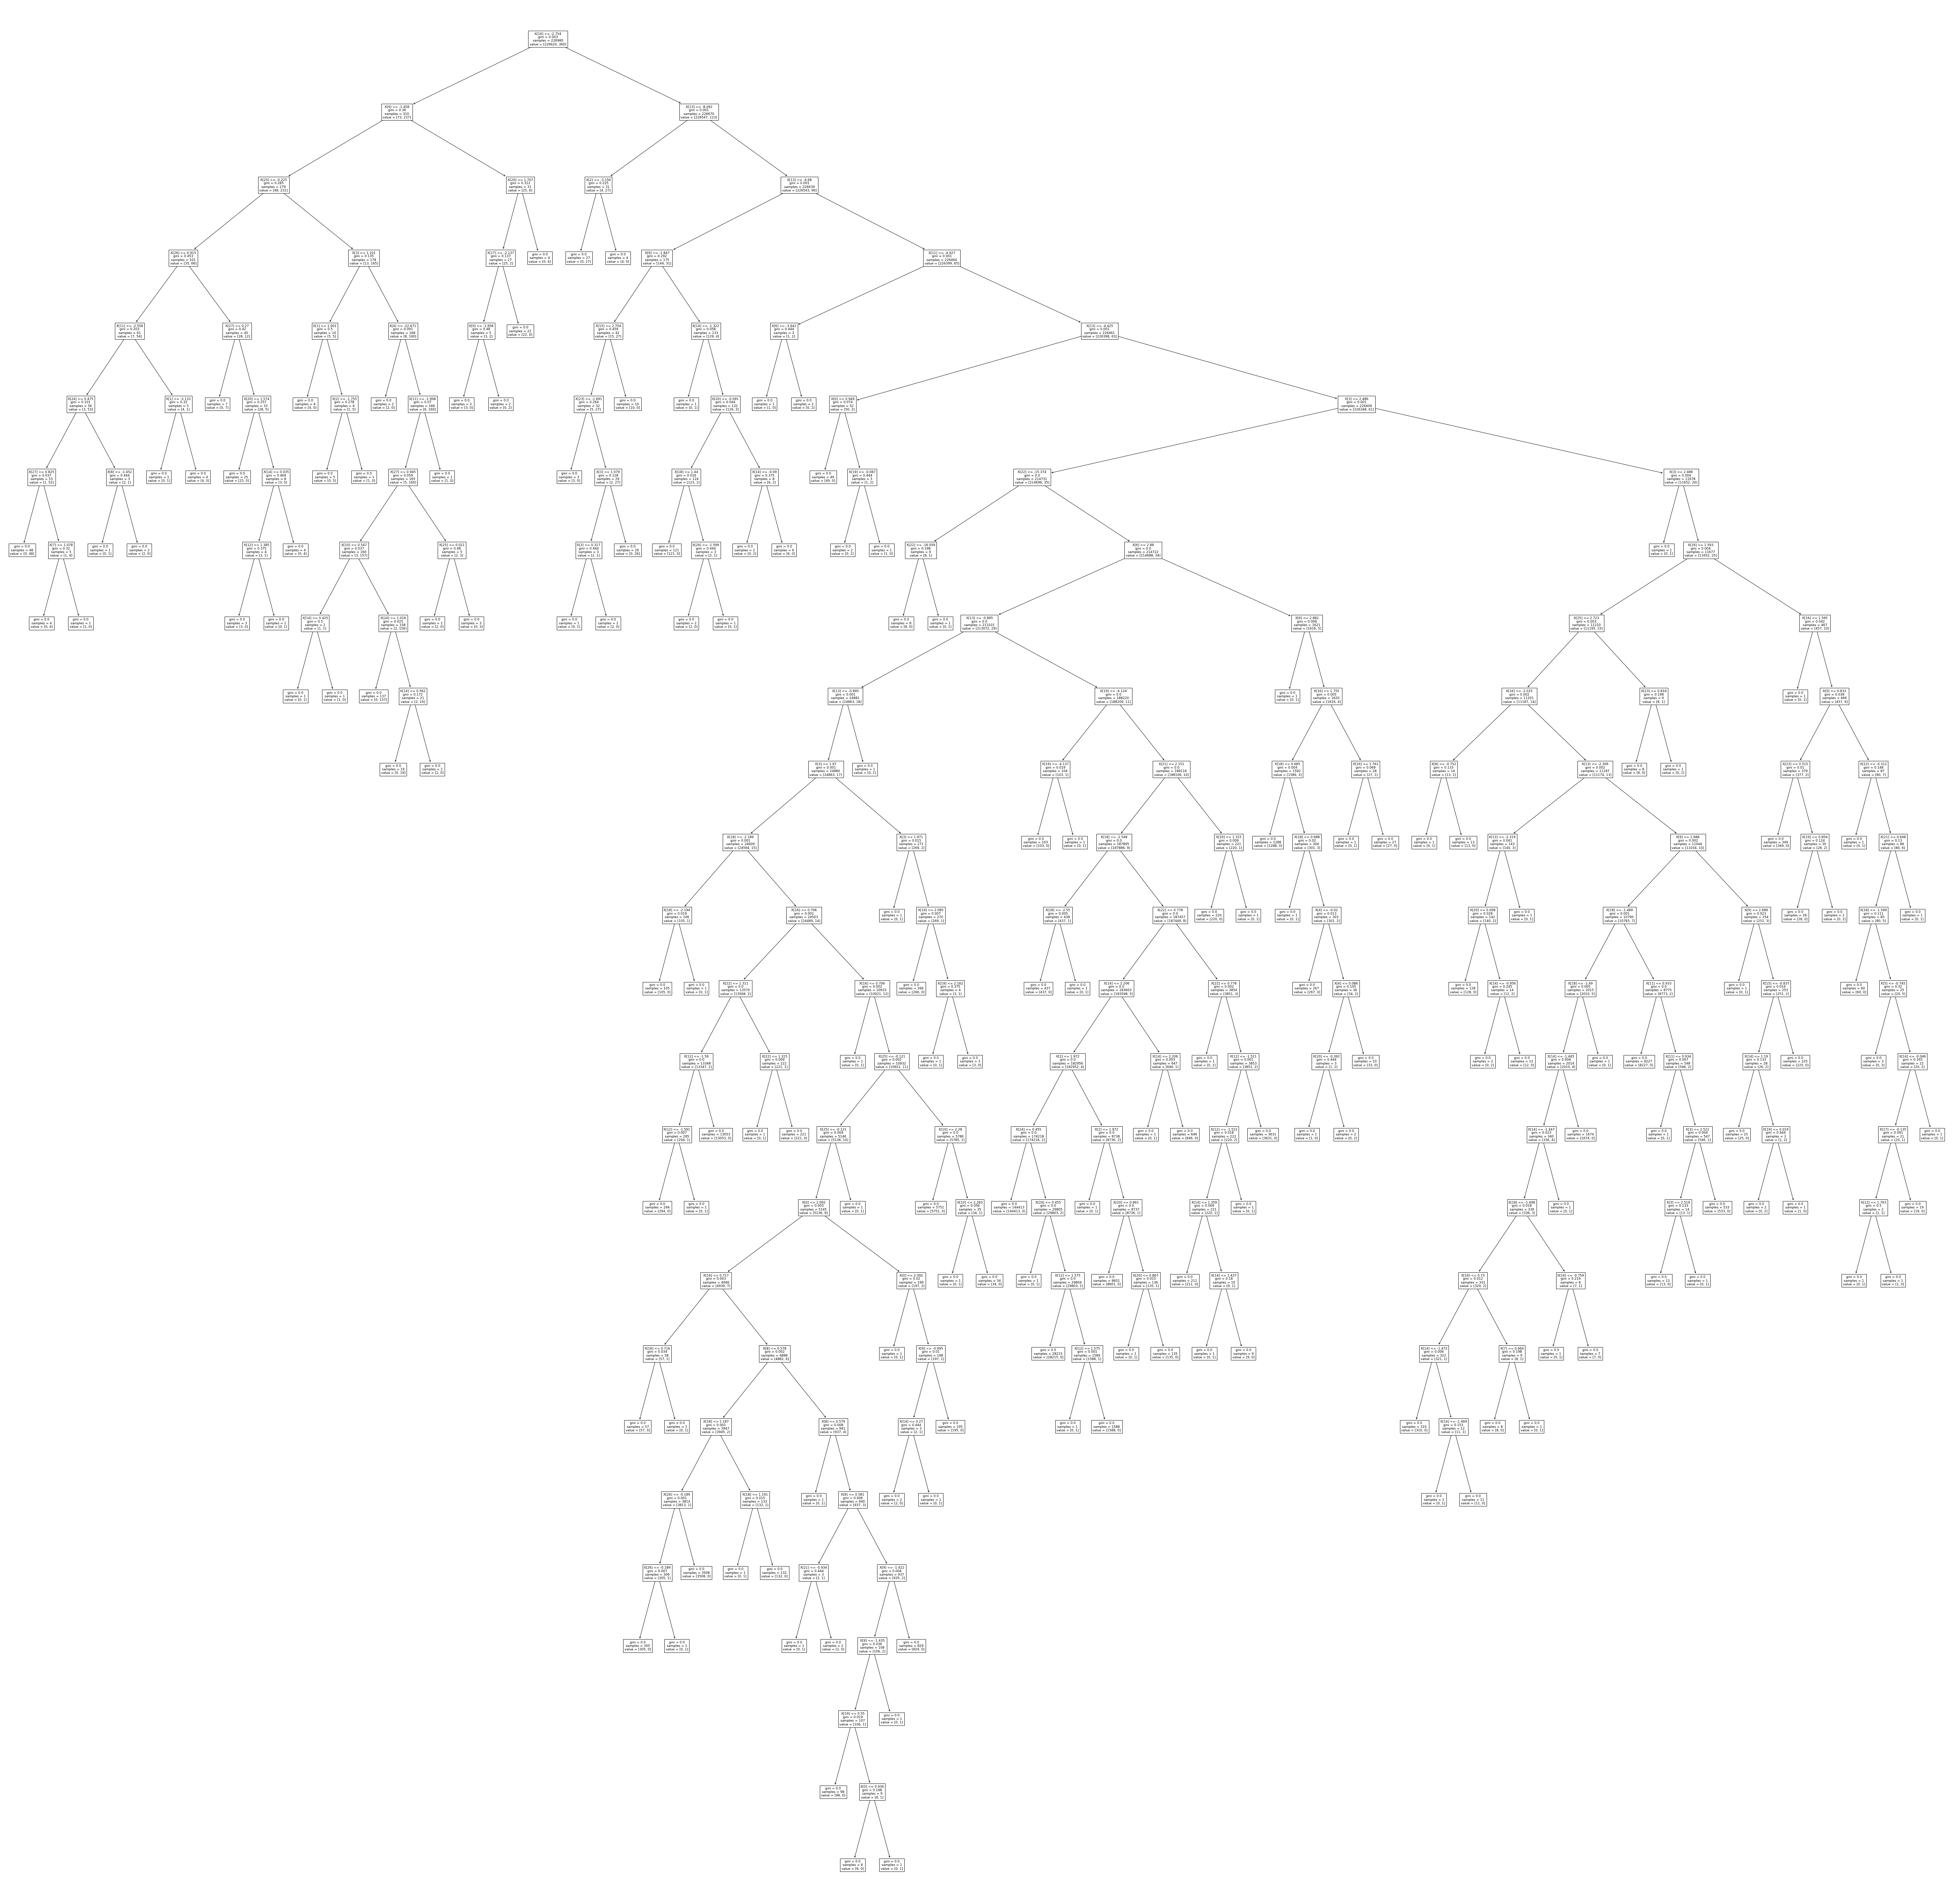

In [ ]:
from sklearn import tree
plt.figure(figsize = (100,100))
tree.plot_tree(dtclf)